In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
amazon_sale_report = pd.read_csv(r"C:\Users\belik\Desktop\дата игры\E-Commerce Sales Dataset\Amazon Sale Report.csv",index_col='index', low_memory=False)

In [3]:
# настраиваем отображение максимального количества колонок и строк

pd.options.display.max_columns =30
pd.options.display.max_rows = 100

In [4]:
amazon_sale_report.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
amazon_sale_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [6]:
amazon_sale_report.nunique().to_frame(name='Count of unique values')

,Count of unique values
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9
Size,11


In [7]:
amazon_sale_report.apply(pd.unique).to_frame(name='Unique values')

,Unique values
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
Size,"[S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]"


In [8]:
amazon_sale_report.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


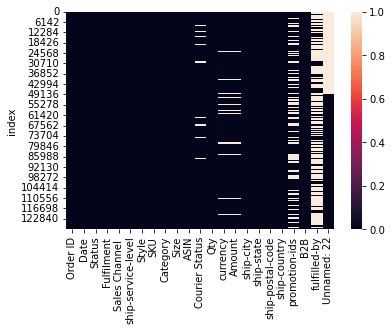

In [9]:
sns.heatmap(amazon_sale_report.isnull())
plt.show()

In [10]:
amazon_sale_report.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

### Очистка

In [11]:
# проверяем на наличие дубликатов
amazon_sale_report.duplicated(['Order ID', 'ASIN']).sum()

7

In [12]:
# удаляем дубликаты
amazon_sale_report.drop_duplicates(['Order ID', 'ASIN'], inplace = True, ignore_index = True)

In [13]:
# задаем формат даты для столбца 'Date'
amazon_sale_report['Date'] = pd.to_datetime(amazon_sale_report['Date'])

In [14]:
# удаляем лишние столбцы
amazon_sale_report.drop(columns=['Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'ship-postal-code'], inplace=True)

In [15]:
# приводим наименование столбцов к единомму формату
amazon_sale_report = amazon_sale_report.rename(columns={"Order ID" : "Order_ID",
                                                        "Date" : "Date",
                                                        "Status" : "Status",
                                                        "Fulfilment" : "Fulfilment",
                                                        "Sales Channel " : "Sales_Channel",
                                                        "ship-service-level" : "Ship_Service_Level",
                                                        "Style" : "Style",
                                                        "SKU" : "SKU",
                                                        "Category" : "Category",
                                                        "Size" : "Size",
                                                        "ASIN" : "ASIN",
                                                        "Courier Status" : "Courier_Status",
                                                        "Qty" : "Qty",
                                                        "Amount" : "Amount",
                                                        "ship-city" : "Ship_City",
                                                        "ship-state" : "Ship_State",
                                                        "promotion-ids" : "Promotion",
                                                        "B2B" : "Customer_type"})

### Заменяем пропуски

In [16]:
# заменяем пропуски Courier_Status, Currency, Amount, Ship_City, Ship_State, Ship_Countryb
amazon_sale_report['Courier_Status'].fillna('Unknown',  inplace = True)
amazon_sale_report['Amount'].fillna(0,  inplace = True)
amazon_sale_report['Ship_City'].fillna('Unknown',  inplace = True)
amazon_sale_report['Ship_State'].fillna('Unknown',  inplace = True)
amazon_sale_report['Promotion'].fillna('Unknown',  inplace = True)

### Убираем дубликаты значений в столбце Ship_City

In [17]:
amazon_sale_report['Ship_City'] = amazon_sale_report['Ship_City'].str.lower()

In [18]:
amazon_sale_report['Ship_State'] = amazon_sale_report['Ship_State'].str.lower()

In [19]:
amazon_sale_report.loc[amazon_sale_report['Ship_State'].isin(['rajasthan', 'rajsthan', 'rajshthan', 'rj']),'Ship_State'] = 'rajasthan'
amazon_sale_report.loc[amazon_sale_report['Ship_State'].isin(['punjab/mohali/zirakpur', 'pb']),'Ship_State'] = 'punjab'
amazon_sale_report.loc[amazon_sale_report['Ship_State'].isin(['ar']),'Ship_State'] = 'arunachal pradesh'
amazon_sale_report.loc[amazon_sale_report['Ship_State'].isin(['nl']),'Ship_State'] = 'nagaland'
amazon_sale_report.loc[amazon_sale_report['Ship_State'].isin(['puducherry']),'Ship_State'] = 'pondicherry'
amazon_sale_report.loc[amazon_sale_report['Ship_State'].isin(['odisha']),'Ship_State'] = 'orissa'
amazon_sale_report.loc[amazon_sale_report['Ship_State'].isin(['new delhi']),'Ship_State'] = 'delhi'

### Заменяем данные в столбце Customer_type

In [20]:
amazon_sale_report['Customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

### Добавляем столбцы с годом, номером месяца и названием месяца

In [21]:
# Проверяем сколько записей попало в дф от Марта
march_dates = amazon_sale_report['Date'][amazon_sale_report['Date'].dt.month == 3]

# Get the number of unique days in March
march_dates.dt.day.nunique()

1

In [22]:
# Удаляем 1 запись марта из дф
amazon_sale_report = amazon_sale_report[(amazon_sale_report['Date'].dt.month != 3)]

In [23]:
# создаем столбец Month_name
amazon_sale_report['Month_name'] = amazon_sale_report['Date'].dt.strftime('%m')

In [24]:
amazon_sale_report['Month_name'].replace(['04', '05', '06'], ['April', 'May', 'June'], inplace=True)

In [25]:
# Превращаем Month_name в категориальный столбец, для этого создаем переменную
month_order = ['April', 'May', 'June']

amazon_sale_report['Month_name'] = pd.Categorical(amazon_sale_report['Month_name'], categories=month_order, ordered=True)

In [26]:
amazon_sale_report['Month_name'].unique()

['April', 'May', 'June']
Categories (3, object): ['April' < 'May' < 'June']

### Size конвектируем в тип категория

In [27]:
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

amazon_sale_report['Size'] = pd.Categorical(amazon_sale_report['Size'], categories=size_order, ordered=True)

### Добавляем столбец Orders_status

In [28]:
amazon_sale_report['Orders_status'] = amazon_sale_report['Status'].copy()

In [29]:
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Shipped - Delivered to Buyer']), 'Orders_status'] = 'Delivered to Buyer'
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Shipped - Returned to Seller']), 'Orders_status'] = 'Returned to Seller'
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Shipped - Picked Up']), 'Orders_status'] = 'Picked Up'
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Pending - Waiting for Pick Up']), 'Orders_status'] = 'Waiting for Pick Up'
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Shipped - Returning to Seller']), 'Orders_status'] = 'Returning to Seller'
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Shipped - Out for Delivery']), 'Orders_status'] = 'Out for Delivery'
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Shipped - Rejected by Buyer']), 'Orders_status'] = 'Rejected by Buyer'
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Shipped - Lost in Transit']), 'Orders_status'] = 'Lost in Transit'
amazon_sale_report.loc[amazon_sale_report['Orders_status'].isin(['Shipped - Damaged']), 'Orders_status'] = 'Damaged'

### Проверяем, что получилось

In [30]:
amazon_sale_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128797 entries, 0 to 128967
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order_ID            128797 non-null  object        
 1   Date                128797 non-null  datetime64[ns]
 2   Status              128797 non-null  object        
 3   Fulfilment          128797 non-null  object        
 4   Sales_Channel       128797 non-null  object        
 5   Ship_Service_Level  128797 non-null  object        
 6   Style               128797 non-null  object        
 7   SKU                 128797 non-null  object        
 8   Category            128797 non-null  object        
 9   Size                128797 non-null  category      
 10  ASIN                128797 non-null  object        
 11  Courier_Status      128797 non-null  object        
 12  Qty                 128797 non-null  int64         
 13  Amount              128797 no

In [31]:
amazon_sale_report.apply(pd.unique).to_frame(name='Unique values')

,Unique values
Order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales_Channel,"[Amazon.in, Non-Amazon]"
Ship_Service_Level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
Size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."


### Исследуем данные

### Доход

Доход за Q2: 70,188,397.00
Доход за Апрель: 25,669,247.00
Доход за Май: 23,469,225.00, что на 8.57 % меньше чем в Апреле
Доход за Июнь: 21,049,925.00, что на 10.31 % меньше чем в Мае
С Апреля по Июнь доход уменьшился на -18.00%


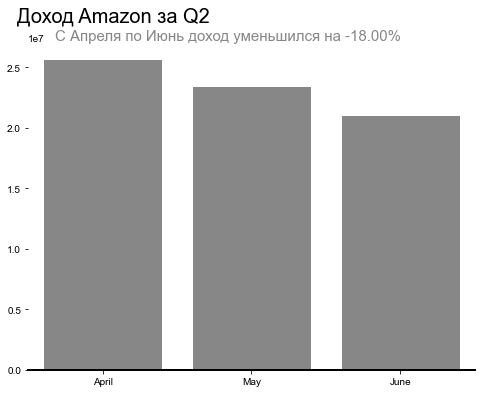

In [32]:
revenue = amazon_sale_report. \
    query('Orders_status != ["Cancelled", "Returned to Seller", "Returning to Seller", "Rejected by Buyer", "Lost in Transit", "Damaged"]')
revenue_by_month = revenue.groupby('Month_name').Amount.sum()
percent_decrease_apr_to_may = (revenue_by_month['April'] - revenue_by_month['May']) / revenue_by_month['April'] * 100
percent_decrease_may_to_jun = (revenue_by_month['May'] - revenue_by_month['June']) / revenue_by_month['May']  * 100
total_decrease = (revenue_by_month['June'] - revenue_by_month['April']) / revenue_by_month['April'] * 100
print(f"Доход за Q2: {revenue.Amount.sum():,.2f}")
print(f"Доход за Апрель: {revenue_by_month['April']:,.2f}")
print(f"Доход за Май: {revenue_by_month['May']:,.2f}, что на {percent_decrease_apr_to_may:.2f} % меньше чем в Апреле")
print(f"Доход за Июнь: {revenue_by_month['June']:,.2f}, что на {percent_decrease_may_to_jun:.2f} % меньше чем в Мае")
print(f"С Апреля по Июнь доход уменьшился на {total_decrease:.2f}%")

fig, ax = plt.subplots(figsize=(8, 6))

sns.set_style('whitegrid')
sns.barplot(x=revenue_by_month.index, y=revenue_by_month.values, color='#878787')

ax.set_title('Доход Amazon за Q2', fontsize=20, x=.19, y=1.05)
ax.text(.06, 1.01, f"С Апреля по Июнь доход уменьшился на {total_decrease:.2f}%", fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

### Доход по категориям товаров

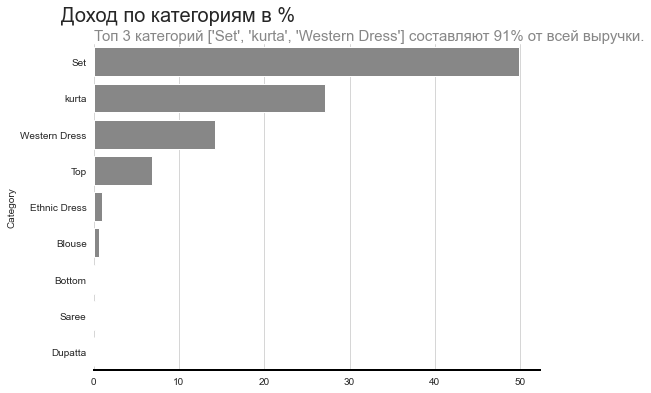

In [33]:
revenue_by_category = revenue.groupby('Category')['Amount'].sum().sort_values(ascending=False)
percent_revenue_by_category = ((revenue_by_category / revenue_by_category.sum()) * 100).sort_values(ascending=False)
top_category = revenue_by_category[:3].index.tolist()
revenue_by_top_category = revenue_by_category[:3].sum() / revenue_by_category.sum() * 100

fig, ax = plt.subplots(figsize=(8, 6))

sns.set_style('whitegrid')
sns.barplot(x=percent_revenue_by_category.values, y=percent_revenue_by_category.index, color='#878787')
ax.text(.00, 1.01, f"Топ 3 категорий {top_category} составляют {revenue_by_top_category:,.0f}% от всей выручки.", fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_title('Доход по категориям в %', fontsize=20, x=.19, y=1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

### Доход от рекламы

Общий доход от рекламы: 52,110,849.00 INR - 74.24% от общего дохода за Q2 2022
Доход от рекламы за Апрель: 19,460,926.00 INR
Доход от рекламы за Май: 17,589,773.00 INR, что на 9.61 % меньше чем в Апреле
Доход от рекламы за Июнь: 15,060,150.00 INR, что на 14.38 % меньше чем в Мае
С Апреля по Июнь доход от рекламы уменьшился на -22.61%


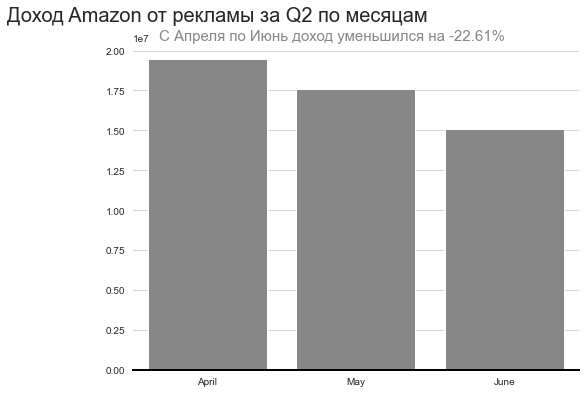

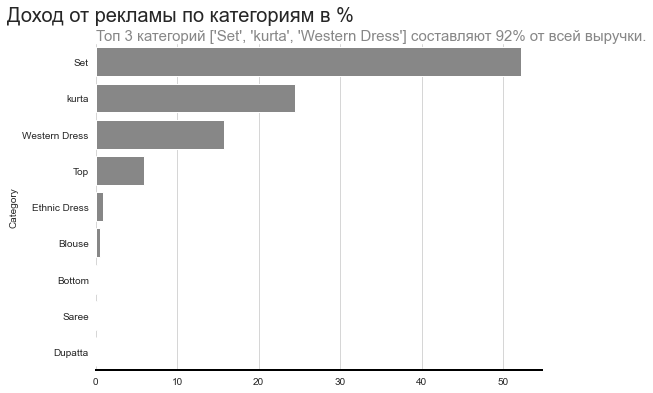

In [34]:
promotion_orders = revenue.query('Promotion != "Unknown"')
revenue_by_month_by_promotion = promotion_orders.groupby('Month_name').Amount.sum()
promotion_percent_decrease_apr_to_may = (revenue_by_month_by_promotion['April'] - revenue_by_month_by_promotion['May']) / revenue_by_month_by_promotion['April'] * 100
promotion_percent_decrease_may_to_jun = (revenue_by_month_by_promotion['May'] - revenue_by_month_by_promotion['June']) / revenue_by_month_by_promotion['May']  * 100
total_promotion_decrease = (revenue_by_month_by_promotion['June'] - revenue_by_month_by_promotion['April']) / revenue_by_month_by_promotion['April'] * 100

promotion_orders_by_category = promotion_orders.groupby('Category')['Amount'].sum().sort_values(ascending=False)
percent_promotion_revenue_by_category = ((promotion_orders_by_category / promotion_orders_by_category.sum()) * 100).sort_values(ascending=False)
promotion_top_category = promotion_orders_by_category[:3].index.tolist()
revenue_by_promotion_top_category = promotion_orders_by_category[:3].sum() / promotion_orders_by_category.sum() * 100

print(f"Общий доход от рекламы: {promotion_orders.Amount.sum():,.2f} INR - {(promotion_orders.Amount.sum() / revenue.Amount.sum() * 100):.2f}% от общего дохода за Q2 2022")
print(f"Доход от рекламы за Апрель: {revenue_by_month_by_promotion['April']:,.2f} INR")
print(f"Доход от рекламы за Май: {revenue_by_month_by_promotion['May']:,.2f} INR, что на {promotion_percent_decrease_apr_to_may:.2f} % меньше чем в Апреле")
print(f"Доход от рекламы за Июнь: {revenue_by_month_by_promotion['June']:,.2f} INR, что на {promotion_percent_decrease_may_to_jun:.2f} % меньше чем в Мае")
print(f"С Апреля по Июнь доход от рекламы уменьшился на {total_promotion_decrease:.2f}%")

fig, ax = plt.subplots(figsize=(8, 6))

sns.set_style('whitegrid')
sns.barplot(x=revenue_by_month_by_promotion.index, y=revenue_by_month_by_promotion.values, color='#878787')
ax.set_title('Доход Amazon от рекламы за Q2 по месяцам', fontsize=20, x=.19, y=1.05)
ax.text(.06, 1.01, f"С Апреля по Июнь доход уменьшился на {total_promotion_decrease:.2f}%", fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))

sns.set_style('whitegrid')
sns.barplot(x=percent_promotion_revenue_by_category.values, y=percent_promotion_revenue_by_category.index, color='#878787')
ax.text(.00, 1.01, f"Топ 3 категорий {promotion_top_category} составляют {revenue_by_promotion_top_category:,.0f}% от всей выручки.", fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_title('Доход от рекламы по категориям в %', fontsize=20, x=.19, y=1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

### Доход по штатам

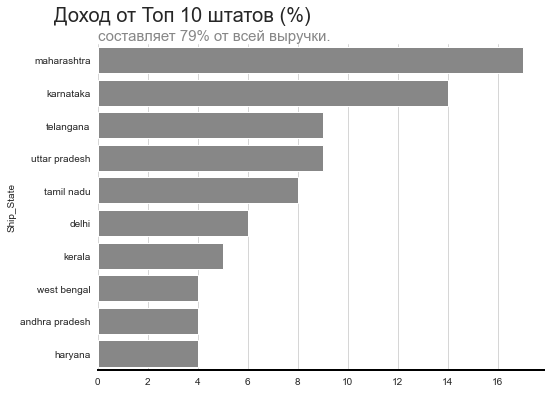

In [42]:
revenue_by_ship_state = revenue.groupby('Ship_State')['Amount'].sum().sort_values(ascending=False)
revenue_by_ship_state_top = revenue_by_ship_state[:10]
percent_revenue_by_ship_state = round(revenue_by_ship_state_top / revenue_by_ship_state.sum() * 100)
percent_revenue_by_ship_state_top = round(revenue_by_ship_state_top.sum() / revenue_by_ship_state.sum() * 100)

fig, ax = plt.subplots(figsize=(8, 6))

sns.set_style('whitegrid')
sns.barplot(x=percent_revenue_by_ship_state.values, y=percent_revenue_by_ship_state.index, color='#878787')
ax.text(.00, 1.01, f"составляет {percent_revenue_by_ship_state_top:,.0f}% от всей выручки.", fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_title('Доход от Топ 10 штатов (%)', fontsize=20, x=.19, y=1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

### Исследование средней стоимости товара и среднее количество в заказе

In [36]:
monthly_order_data = revenue.groupby(pd.Grouper(key='Date', freq='M')).agg({'Amount': 'mean', 'Qty': 'mean'}).round(2)
monthly_order_data = monthly_order_data.rename(columns={'Amount': 'Average_order_amount', 'Qty': 'Average_order_quantity'})
print('Средние стоимость и количество товара в заказе за месяц:')
print(monthly_order_data)
print("\n")
avg_price_by_category = revenue.groupby('Category')['Amount'].mean().sort_values(ascending=False).round(2).reset_index()
avg_price_by_category = avg_price_by_category.rename(columns={"Amount" : "Avg_price"})
avg_price_by_promotion = promotion_orders.groupby('Category')['Amount'].mean().round(2).sort_values(ascending=False).round(2).reset_index()
avg_price_by_promotion = avg_price_by_promotion.rename(columns={"Amount" : "Avg_price_promotion"})
avg_price = avg_price_by_category.merge(avg_price_by_promotion)
avg_price['Percent'] = round(avg_price.Avg_price_promotion / avg_price.Avg_price * 100, 2)-100
print('Средняя цена за товар по категориям товаров:')
print(avg_price)
print("\n")
avg_price_by_ship_state = revenue.groupby('Ship_State')['Amount'].mean().round(2).sort_values(ascending=False).round(2)
print('Средняя цена за товар по штатам:')
print(avg_price_by_ship_state)


Средние стоимость и количество товара в заказе за месяц:
            Average_order_amount  Average_order_quantity
Date                                                    
2022-04-30                625.67                     1.0
2022-05-31                662.24                     1.0
2022-06-30                659.75                     1.0


Средняя цена за товар по категориям товаров:
        Category  Avg_price  Avg_price_promotion  Percent
0            Set     832.15               844.66     1.50
1          Saree     800.68               804.64     0.49
2  Western Dress     763.95               763.08    -0.11
3   Ethnic Dress     722.50               749.86     3.79
4            Top     524.96               534.72     1.86
5         Blouse     516.16               538.15     4.26
6          kurta     455.72               469.29     2.98
7         Bottom     356.88               370.56     3.83
8        Dupatta     305.00               305.00     0.00


Средняя цена за товар по штат

### Исследование количества заказов

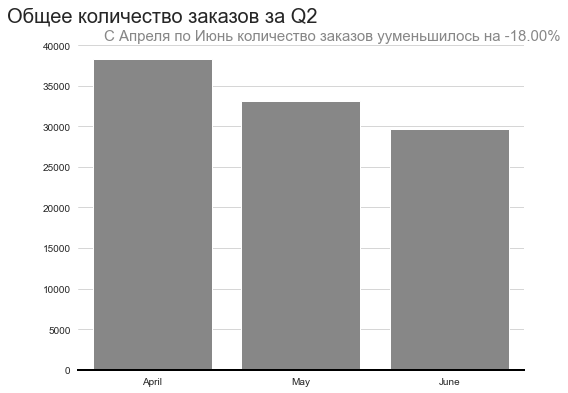

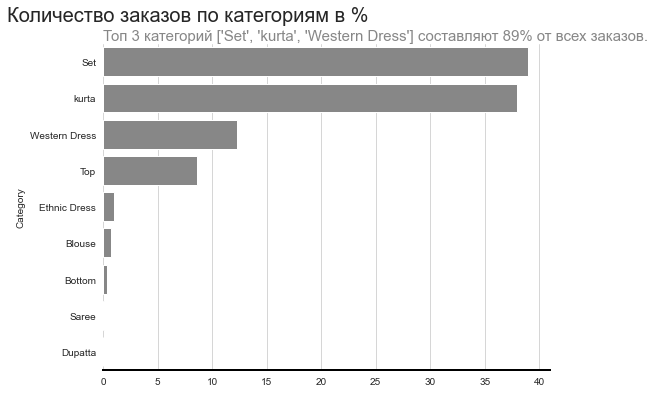

In [37]:
count_order_by_month = revenue.groupby('Month_name')['Order_ID'].nunique()
total_orders_decrease = (count_order_by_month['June'] - count_order_by_month['April']) / count_order_by_month['April'] * 100

fig, ax = plt.subplots(figsize=(8, 6))

sns.set_style('whitegrid')
sns.barplot(x=count_order_by_month.index, y=count_order_by_month.values, color='#878787')

ax.set_title('Общее количество заказов за Q2', fontsize=20, x=.19, y=1.05)
ax.text(.06, 1.01, f"С Апреля по Июнь количество заказов ууменьшилось на {total_decrease:.2f}%", fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

count_orders_by_category = revenue.groupby('Category')['Order_ID'].nunique().sort_values(ascending=False)
percent_orders_by_category = round(((count_orders_by_category / count_orders_by_category.sum()) * 100).sort_values(ascending=False), 2)
top_orders_category = count_orders_by_category[:3].index.tolist()
orders_by_top_category = count_orders_by_category[:3].sum() / count_orders_by_category.sum() * 100

fig, ax = plt.subplots(figsize=(8, 6))

sns.set_style('whitegrid')
sns.barplot(x=percent_orders_by_category.values, y=percent_orders_by_category.index, color='#878787')
ax.text(.00, 1.01, f"Топ 3 категорий {top_orders_category} составляют {orders_by_top_category:,.0f}% от всех заказов.", fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_title('Количество заказов по категориям в %', fontsize=20, x=.19, y=1.05)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()

### Отмененные и возвращенные заказы

In [38]:
cancelled_orders = amazon_sale_report[amazon_sale_report['Orders_status'].isin(["Cancelled", "Lost in Transit"])]
total_cancelled = cancelled_orders['Order_ID'].nunique()
percent_cancelled = round(total_cancelled / amazon_sale_report['Order_ID'].nunique() * 100, 2)
cancelled_orders_by_category = round(cancelled_orders.groupby('Category')['Order_ID'].nunique().sort_values(ascending=False) / total_cancelled * 100, 2)
returned_orders = amazon_sale_report[amazon_sale_report['Orders_status'].isin(["Returned to Seller", "Returning to Seller", "Rejected by Buyer", "Damaged"])]
total_returned = returned_orders['Order_ID'].nunique()
percent_returned = round(total_returned / amazon_sale_report['Order_ID'].nunique() * 100, 2)
returned_orders_by_category = round(returned_orders.groupby('Category')['Order_ID'].nunique().sort_values(ascending=False) / total_returned * 100, 2)
total_cancelled_returned = total_cancelled + total_returned
percent_cancelled_returned = total_cancelled_returned / amazon_sale_report['Order_ID'].nunique() * 100

print(f"Количество отмененных заказов: {total_cancelled}, которые составляют {percent_cancelled}% от всех заказов.")
print(f"Количество возвращенных заказов: {total_returned}, которые составляют {percent_returned}% от всех заказов.")
print(f"Они составлют {percent_cancelled_returned:.2f} % от всех заказов")
print('\n')
print('Процент отмененных заказов по категориям товаров:')
print(cancelled_orders_by_category.apply(lambda x: "{:.2f}%".format(x)))
print('\n')
print('Процент возвращенных заказов по категориям товаров:')
print(returned_orders_by_category.apply(lambda x: "{:.2f}%".format(x)))
print('\n')

Количество отмененных заказов: 17171, которые составляют 14.28% от всех заказов.
Количество возвращенных заказов: 1992, которые составляют 1.66% от всех заказов.
Они составлют 15.94 % от всех заказов


Процент отмененных заказов по категориям товаров:
Category
Set              40.66%
kurta            39.69%
Western Dress    12.04%
Top               7.17%
Ethnic Dress      0.83%
Blouse            0.66%
Bottom            0.31%
Saree             0.12%
Name: Order_ID, dtype: object


Процент возвращенных заказов по категориям товаров:
Category
Set              40.41%
kurta            35.89%
Western Dress    16.77%
Top               6.38%
Ethnic Dress      0.80%
Blouse            0.60%
Bottom            0.30%
Saree             0.05%
Name: Order_ID, dtype: object




### Популярные категории в каждом штате

In [39]:
popular_category_by_state = revenue.groupby(['Ship_State', 'Category'])['Qty'].sum().reset_index()
popular_category_by_state = popular_category_by_state.sort_values(['Ship_State', 'Qty'], ascending=[True, False])
popular_category_by_state = popular_category_by_state.drop_duplicates(subset=['Ship_State'])
print("Самые популярные категории в штатах:")
print(popular_category_by_state)
print("\n")


Самые популярные категории в штатах:
             Ship_State Category   Qty
0    andaman & nicobar       Set    98
11       andhra pradesh    kurta  2110
14    arunachal pradesh      Set    51
21                assam      Set   589
29                bihar      Set   932
36           chandigarh      Set   130
43         chhattisgarh      Set   357
47      dadra and nagar      Set    28
55                delhi      Set  2703
66                  goa    kurta   449
71              gujarat      Set  1478
79              haryana      Set  1738
86     himachal pradesh      Set   341
93      jammu & kashmir      Set   311
100           jharkhand      Set   592
112           karnataka    kurta  5805
120              kerala    kurta  2412
121              ladakh      Set    29
125         lakshadweep      Set     2
131      madhya pradesh      Set   959
142         maharashtra    kurta  7124
146             manipur      Set   150
153           meghalaya      Set    65
158             mizoram    

### Анализ по типу клиентов

In [40]:
amount_by_customer_type = revenue.groupby('Customer_type')['Amount'].sum().sort_values(ascending=False).reset_index()
amount_by_customer_type['Percent'] = round(amount_by_customer_type.Amount / amount_by_customer_type.Amount.sum() * 100)
print("Доход по типу пользователей:")
print(amount_by_customer_type)
print('\n')
avg_order_amount_by_customer_type = revenue.groupby('Customer_type')['Amount'].mean().round(2)
print("Средняя стоимость заказа по типу пользователей:")
print(avg_order_amount_by_customer_type)


Доход по типу пользователей:
  Customer_type      Amount  Percent
0      customer  69634986.0     99.0
1      business    553411.0      1.0


Средняя стоимость заказа по типу пользователей:
Customer_type
business    701.41
customer    647.27
Name: Amount, dtype: float64
